## Experimental validation of *ASF1A/ASF1B* and *COPS7A/COPS7B*

Experiments performed by Niall Quinn

- Sheet 1: COPS7A/B Raw Viability
- Sheet 2: COPS7A/B Normalized Viability
- Sheet 3: ASF1A/B Raw Viability
- Sheet 4: ASF1A/B Normalized Viability

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 1
%aimport graphing_params

get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/' +'/'.join(folders) +'/'+ fname)

file_validation = get_local_data_path(['results'], 'ASF1AB_COPS7AB_validation_data.xlsx')

### *ASF1A/ASF1B*

In [2]:
asf1ab_data = pd.read_excel(file_validation, sheet_name=3)

In [3]:
asf1ab_data[:1]

,CellLine,siRNA,NPI
0,ASF1A_KO_C5,ASF1A,0.933457


In [158]:
# two sided heteroscedastic  t-test
def do_ttest(data, siRNA, cellLine1, cellLine2):
    pval = stats.ttest_ind(data[(data.siRNA==siRNA) & (data.CellLine==cellLine1)].NPI,
                           data[(data.siRNA==siRNA) & (data.CellLine==cellLine2)].NPI, equal_var=False)[1]
    print('Comparing siRNA of %s in %s vs. %s p=%.5f' % (siRNA, cellLine1,cellLine2, pval))
    return pval

def draw_significance(x1, x2, y1, y2, pval, ax, fraction=0.1):
    ax.text(x1-0.1, y1+0.11, 'p=%.4f'% (pval), fontsize=9, color='#666')
    ax.annotate("", xy=(x1, y1), xycoords='data', xytext=(x2, y2), 
                arrowprops=dict(connectionstyle="bar,angle=180,fraction="+str(fraction), arrowstyle="-", color='#666'))

Comparing siRNA of ASF1A in WT vs. ASF1B_KO p=0.00291
Comparing siRNA of ASF1B in WT vs. ASF1A_KO_C5 p=0.00368


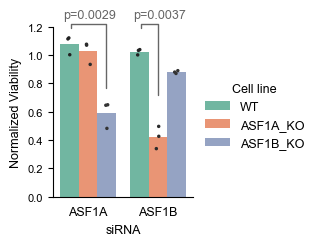

In [157]:
with plt.rc_context({'xtick.labelsize':9, 'xtick.bottom': False}):
    f, ax = plt.subplots(1, 1, figsize=(2.1,2.55))
    sns.barplot(x='siRNA', y='NPI', hue='CellLine', data=asf1ab_data, hue_order=['WT','ASF1A_KO_C5', 'ASF1B_KO'], 
                palette=['#71b6a1', '#e99575', '#95a3c3'], saturation=1, ci=None, ax=ax, zorder=0, linewidth=0)
    sns.stripplot(x='siRNA', y='NPI', hue='CellLine', data=asf1ab_data, hue_order=['WT','ASF1A_KO_C5', 'ASF1B_KO'], 
                  ax=ax, zorder=10, color='#333', jitter=True, dodge=True, size=2.5)
    ax.set_ylabel('Normalized Viability')
    ax.set_ylim([0,1.2])

    # Add significance bars
    pval = do_ttest(asf1ab_data, 'ASF1A', 'WT', 'ASF1B_KO')
    draw_significance(-0.25, 0.25, 1.17, 0.75, pval, ax)
    
    pval = do_ttest(asf1ab_data, 'ASF1B', 'WT', 'ASF1A_KO_C5')
    draw_significance(0.75, 1, 1.17, 0.7, pval, ax)
    
    plt.tight_layout()    
    handles, labels = ax.get_legend_handles_labels()
    _ = plt.legend(handles[3:], ['WT','ASF1A_KO', 'ASF1B_KO'], bbox_to_anchor=(1.05, 0.7), borderaxespad=0., title='Cell line')
    
    f.savefig("../figures/for_paper/asf1ab_validation.svg", bbox_inches="tight", dpi=300)

### *COPS7A/COPS7B*

In [116]:
cops7ab_data = pd.read_excel(file_validation, sheet_name=1)

In [119]:
cops7ab_data[:1]

,CellLine,siRNA,NPI
0,COPS7A_KO,COPS7A,0.85275


Comparing siRNA of COPS7A in WT vs. COPS7B_KO p=0.00390
Comparing siRNA of COPS7B in WT vs. COPS7A_KO p=0.00018


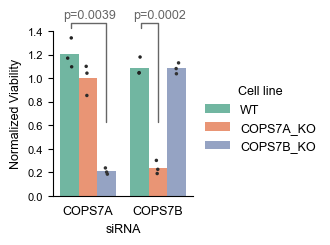

In [159]:
with plt.rc_context({'xtick.labelsize':9, 'xtick.bottom': False}):
    f, ax = plt.subplots(1, 1, figsize=(2.1,2.55))
    sns.barplot(x='siRNA', y='NPI', hue='CellLine', data=cops7ab_data, hue_order=['WT','COPS7A_KO', 'COPS7B_KO'], 
                palette=['#71b6a1', '#e99575', '#95a3c3'], saturation=1, ci=None, ax=ax, zorder=0, linewidth=0)
    sns.stripplot(x='siRNA', y='NPI', hue='CellLine', data=cops7ab_data, hue_order=['WT','COPS7A_KO', 'COPS7B_KO'], 
                  ax=ax, zorder=10, color='#333', jitter=True, dodge=True, size=2.5)
    ax.set_ylabel('Normalized Viability')
    ax.set_ylim([0,1.4])
    
    # Add significance bars
    pval = do_ttest(cops7ab_data, 'COPS7A', 'WT', 'COPS7B_KO')
    draw_significance(-0.25, 0.25, 1.4, 0.6, pval, ax, fraction=0.08)
    
    pval = do_ttest(cops7ab_data, 'COPS7B', 'WT', 'COPS7A_KO')
    draw_significance(0.75, 1, 1.4, 0.6, pval, ax, fraction=0.08)
    
    plt.tight_layout()
    handles, labels = ax.get_legend_handles_labels()
    _ = plt.legend(handles[3:], labels[3:], bbox_to_anchor=(1.05, 0.7), borderaxespad=0., title='Cell line')
    
    f.savefig("../figures/for_paper/cops7ab_validation.svg", bbox_inches="tight", dpi=300)